### Housing Price Predection

### Importing Required Libraries

In [83]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
#import warnings
#warnings.filterwarnings("ignore")
%matplotlib inline

### Importing & Reading Data

Data is being imported using pandas .read_csv() function

In [2]:
df = pd.read_csv(r'C:\Users\utkar\OneDrive\Desktop\Machine Learning\London.csv')
df.head()

,Unnamed: 0,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


### Understanding The Data

We have a dataset which contain data regarding the house prices in London. 

-   **Property Name** e.g. Queen ROad
-   **Price** e.g. 735000
-   **House Type** e.g. House
-   **Area in sq ft** e.g. 814
-   **No. of Bedrooms** e.g. 5
-   **No. of Bathrooms** e.g 4
-   **No. of Receptions** e.g. 5
-   **Location** e.g. Wimbledon
-   **City/County** e.g. London
-   **Postal Code** e.g. SW19 8NY

### Data Exploration

First we will check how many rows and columns we have in our dataset and to do so we will use .shape 

In [3]:
df.shape

(3480, 11)

Now to get a descreptive analysis of out dataset we will use .describe() function

In [4]:
df.describe()

,Unnamed: 0,Price,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions
count,3480.000000,3.480000e+03,3480.000000,3480.000000,3480.000000,3480.000000
mean,1739.500000,1.864173e+06,1712.973563,3.103736,3.103736,3.103736
std,1004.733796,2.267283e+06,1364.259351,1.517698,1.517698,1.517698
min,0.000000,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,869.750000,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1739.500000,1.220000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2609.250000,2.150000e+06,2157.250000,4.000000,4.000000,4.000000
max,3479.000000,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


To check whether we have null values or not we will use .isnull().sum() method

We will drop the Column which we don't require

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Property Name      3480 non-null   object
 1   Price              3480 non-null   int64 
 2   House Type         3480 non-null   object
 3   Area in sq ft      3480 non-null   int64 
 4   No. of Bedrooms    3480 non-null   int64 
 5   No. of Bathrooms   3480 non-null   int64 
 6   No. of Receptions  3480 non-null   int64 
 7   Location           2518 non-null   object
 8   City/County        3480 non-null   object
 9   Postal Code        3480 non-null   object
dtypes: int64(5), object(5)
memory usage: 204.0+ KB


In [5]:
df.isnull().sum()

Unnamed: 0             0
Property Name          0
Price                  0
House Type             0
Area in sq ft          0
No. of Bedrooms        0
No. of Bathrooms       0
No. of Receptions      0
Location             962
City/County            0
Postal Code            0
dtype: int64

Now to treat null values in Location column we will replace the null values by its mode. We do so by using .fillna() for filling null values and .mode() for finding mode of the column.

In [8]:
df['Location'].fillna(df['Location'].mode()[0], inplace = True)

In [6]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

After filling the values we will again check the null values

In [9]:
df.isnull().sum()

Property Name        0
Price                0
House Type           0
Area in sq ft        0
No. of Bedrooms      0
No. of Bathrooms     0
No. of Receptions    0
Location             0
City/County          0
Postal Code          0
dtype: int64

Correlation Matrix to check the correlation between Price(Dependent Variable) and other Independent Variable

<AxesSubplot:>

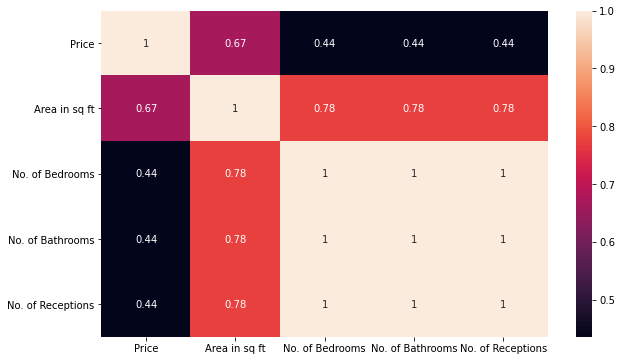

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [12]:
cdf = df[['Property Name','Price','House Type','Area in sq ft','No. of Bedrooms','No. of Bathrooms', 'No. of Receptions', 'Location', 'City/County', 'Postal Code']]
cdf.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL


Now we will create a new column using lambda function

In [13]:
cdf['City'] = cdf['City/County'].apply(lambda x: 1 if x == "London" else 0)
print(cdf['City'])

0       1
1       1
2       1
3       1
4       1
       ..
3475    0
3476    1
3477    1
3478    1
3479    1
Name: City, Length: 3480, dtype: int64


<AxesSubplot:xlabel='City', ylabel='Price'>

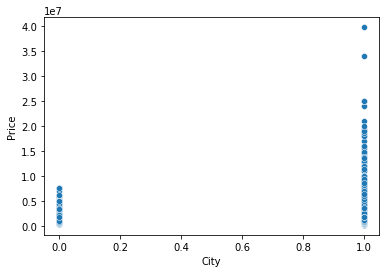

In [14]:
sns.scatterplot(x = cdf['City'], y = cdf['Price'])

In [15]:
cdf['City'].unique()

array([1, 0], dtype=int64)

Now we will plot the dependent variable graph to check if it is rightly skewed 

<AxesSubplot:xlabel='Price', ylabel='Density'>

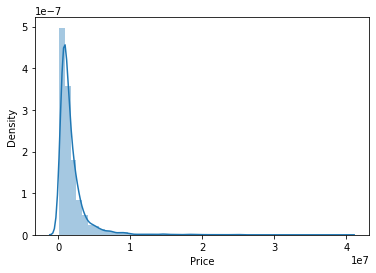

In [84]:
sns.distplot(cdf['Price'])

Now to check the relation between different columns we will plot a series of graph

<AxesSubplot:xlabel='Area in sq ft', ylabel='Price'>

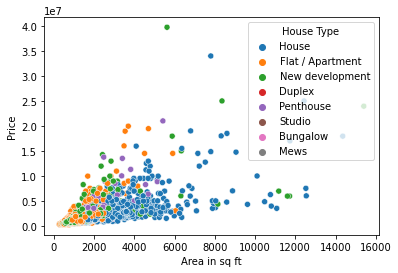

In [77]:
sns.scatterplot(x = cdf['Area in sq ft'], y = cdf['Price'], hue = df['House Type']) 

<AxesSubplot:xlabel='No. of Receptions', ylabel='Price'>

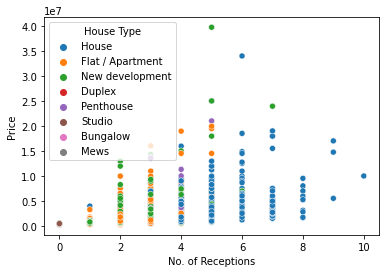

In [18]:
sns.scatterplot(x = cdf['No. of Receptions'], y = cdf['Price'], hue = df['House Type']) 

Since the values of Price is a large value so we will apply a log transformation

In [19]:
cdf['LogPrice'] = np.log(cdf['Price'])

In [20]:
cdf['Price_per_area'] = (cdf['LogPrice']*cdf['Area in sq ft'])

<AxesSubplot:xlabel='LogPrice', ylabel='Density'>

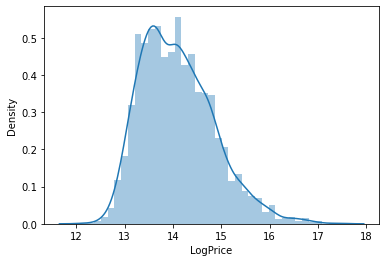

In [82]:
sns.distplot(cdf['LogPrice'])

To convert the categorical values into numerical value we will use Label Encoder 

In [25]:
#Import library:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
#New variable for outlet
cdf['Housetype'] = le.fit_transform(cdf['House Type'])
var_mod = ['Price', 'Area in sq ft', 'Housetype', 'No. of Bedrooms', 'City/County']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [85]:
cdf['PropertyName'] = le.fit_transform(cdf['Property Name'])
var_model = ['Price', 'Area in sq ft', 'Housetype', 'No. of Bedrooms', 'City/County', 'PropertyName']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [86]:
cdf.head()

,Property Name,Price,House Type,Area in sq ft,No. of Bedrooms,No. of Bathrooms,No. of Receptions,Location,City/County,Postal Code,City,LogPrice,Price_per_area,Area_sq,Bedrooms,Housetype,PropertyName
0,Queens Road,1675000,House,2716,5,5,5,Wimbledon,London,SW19 8NY,1,14.331324,38923.875232,2716,5,3,1739
1,Seward Street,650000,Flat / Apartment,814,2,2,2,Clerkenwell,London,EC1V 3PA,1,13.384728,10895.168300,814,2,2,1888
2,Hotham Road,735000,Flat / Apartment,761,2,2,2,Putney,London,SW15 1QL,1,13.507626,10279.303217,761,2,2,1147
3,Festing Road,1765000,House,1986,4,4,4,Putney,London,SW15 1LP,1,14.383661,28565.951239,1986,4,3,850
4,Spencer Walk,675000,Flat / Apartment,700,2,2,2,Putney,London,SW15 1PL,1,13.422468,9395.727579,700,2,2,1945


In [26]:
cdf['Area_sq'] = cdf['Area in sq ft']
cdf['Bedrooms'] = cdf['No. of Bedrooms']

In [42]:
data = cdf[['Area_sq', 'Bedrooms', 'City', 'Housetype','Price_per_area']]

In [43]:
X = data.drop('Price_per_area', axis=1) #independent variables

Y = data['Price_per_area'] #dependent variable

We will now split the data into test and train part and now we will use linear regression model to predict the dependent variable

In [44]:
from sklearn.model_selection import train_test_split #train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 

In [35]:
#test_train = np.random.rand(len(df)) < 0.8
#train = cdf[test_train]
#test = cdf[~test_train]

Using linear model from sklearn library and fit our model and find regression coefficent and regression intercept

In [45]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Area_sq', 'Bedrooms', 'City', 'Housetype']])
y = np.asanyarray(train[['Price_per_area']])
regr.fit(X_train,Y_train)
print(regr.coef_)

[  16.51721087 -672.37709224 1479.61164431   46.16124409]


To predict we will use regression predict function

In [47]:
pred = regr.predict(X_test)

In [54]:
#ypredict = regr.predict(test[['Area_sq', 'Bedrooms', 'City', 'Housetype']])
#x = np.asanyarray(test[['Area_sq', 'Bedrooms', 'City', 'Housetype']])
#y = np.asanyarray(test[['Price_per_area']])
#print("Residual sum of squares: %.2f"
 #     % np.mean((ypredict - y) ** 2))
#print('Variance score: %.2f' % regr.score(x, y))

### Evaluation

```
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
```

In [59]:
from sklearn.metrics import mean_squared_error
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_test - pred)))
rmse = np.sqrt(mean_squared_error(Y_test, pred)) #RMSE for the predicted value
rmse

Mean absolute error: 698.21


1097.5104629468042

In [53]:
regr.score(X_test, Y_test)

0.9976305133042033